In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
sys.path.append("../../")
import data_loading as dl

from microfit import run_plotter as rp
from microfit import histogram as hist

In [3]:
RUN = ["1"]

rundata, mc_weights, data_pot = dl.load_runs(
    RUN,
    data="bnb",
    truth_filtered_sets=["nue"],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
    load_lee=False,
    blinded=False,
    enable_cache=True,
)

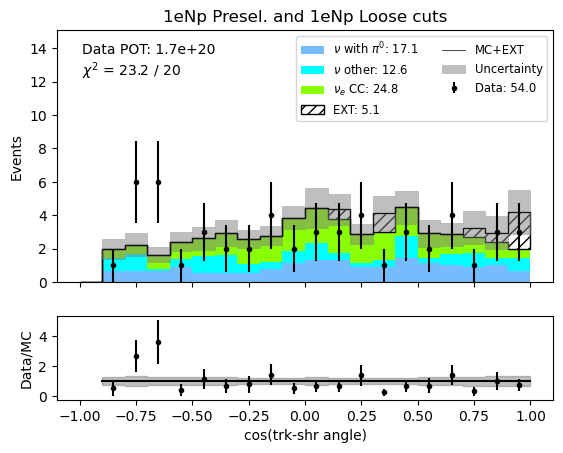

In [7]:
import matplotlib.pyplot as plt
from microfit import variable_definitions as vdef
from microfit import selections

selection = "NPL"
preselection = "NP"
# ('shr_trk_len', 40, (0, 400), 'Shower track fit length [cm]')
binning = hist.Binning.from_config('tksh_angle', 20, (-1, 1), 'cos(trk-shr angle)')
# binning = hist.Binning.from_config("trk_energy_tot", 20, (0.05, 1.50), "reconstructed track energy [GeV]")
# binning = hist.Binning.from_config("reco_e", 10, (0.15, 1.55), r"Reconstructed Energy [GeV]")
signal_generator = hist.RunHistGenerator(
    rundata,
    binning,
    data_pot=data_pot,
    selection=selection,
    preselection=preselection,
    sideband_generator=None,
    uncertainty_defaults=None,
)
plotter = rp.RunHistPlotter(signal_generator)
axes = plotter.plot(
    category_column="paper_category",
    include_multisim_errors=True,
    add_ext_error_floor=False,
    smooth_ext_histogram=False,
    show_data_mc_ratio=True,
    show_chi_square=True,
)
plt.savefig(f"tksh_angle_{selection}_{preselection}_unsmoothed.pdf")
plt.show()

In [12]:
print(plotter.get_selection_title(selection, preselection))

1eNp Presel. and 1eNp Loose cuts


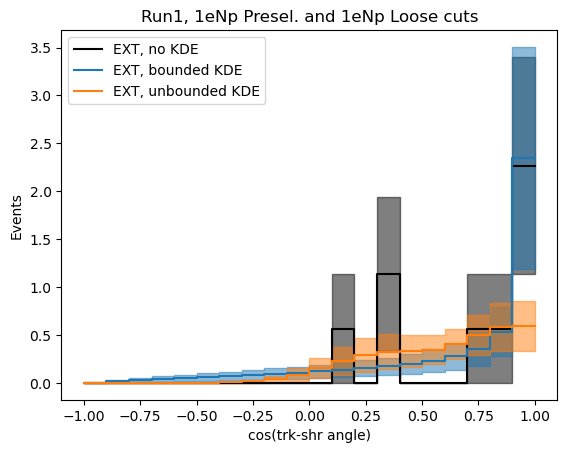

In [18]:
hist_auto_smooth = signal_generator.ext_hist_generator.generate(use_kde_smoothing=True, options={"bound_transformation": "auto"})
hist_nobound_smooth = signal_generator.ext_hist_generator.generate(use_kde_smoothing=True, options={"bound_transformation": "none"})
hist_no_smooth = signal_generator.ext_hist_generator.generate(use_kde_smoothing=False)
fig, ax = plt.subplots()
hist_no_smooth.draw(ax=ax, label="EXT, no KDE", color="black")
hist_auto_smooth.draw(ax=ax, label="EXT, bounded KDE")
hist_nobound_smooth.draw(ax=ax, label="EXT, unbounded KDE")

plt.legend(loc="upper left")
plt.title("Run1, " + plotter.get_selection_title(selection, preselection))
plt.savefig(f"tksh_angle_{selection}_{preselection}_kde_comparison.pdf")
plt.show()


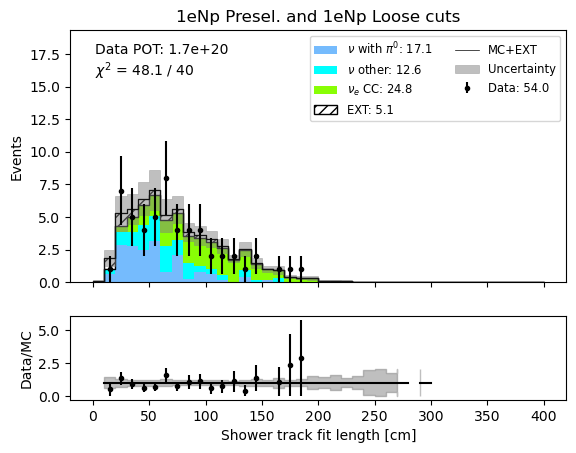

In [6]:
import matplotlib.pyplot as plt
from microfit import variable_definitions as vdef
from microfit import selections

selection = "NPL"
preselection = "NP"

binning = hist.Binning.from_config("shr_trk_len", 40, (0, 400), "Shower track fit length [cm]")
signal_generator = hist.RunHistGenerator(
    rundata,
    binning,
    data_pot=data_pot,
    selection=selection,
    preselection=preselection,
    sideband_generator=None,
    uncertainty_defaults=None,
)
plotter = rp.RunHistPlotter(signal_generator)
axes = plotter.plot(
    category_column="paper_category",
    include_multisim_errors=True,
    add_ext_error_floor=False,
    smooth_ext_histogram=True,
    show_data_mc_ratio=True,
    show_chi_square=True,
)
plt.show()

('hits_ratio', 20, (0, 1), 'shower hits/all hits')


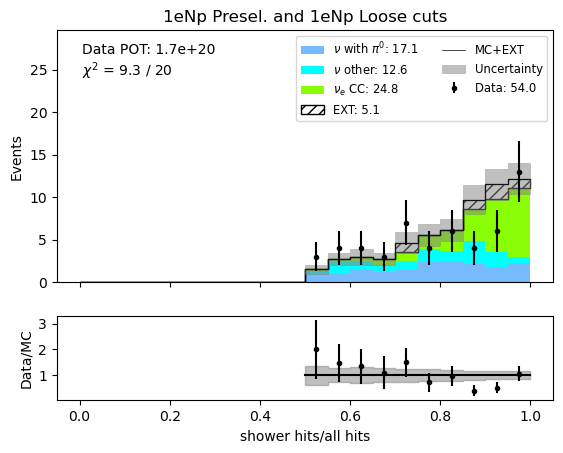

('trkfit', 20, (0, 1.0), 'Fraction of Track-fitted points')


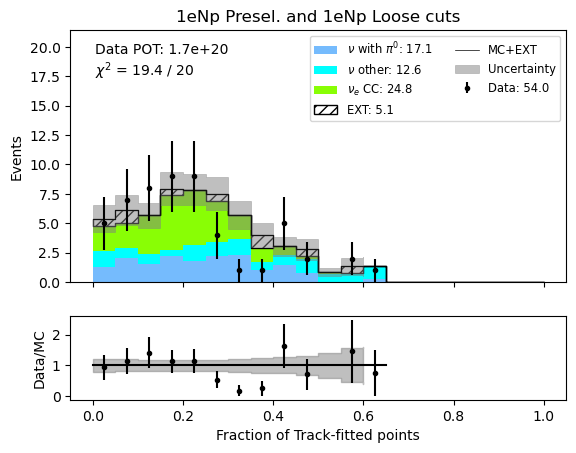

('subcluster', 20, (0, 40), 'N sub-clusters in shower')


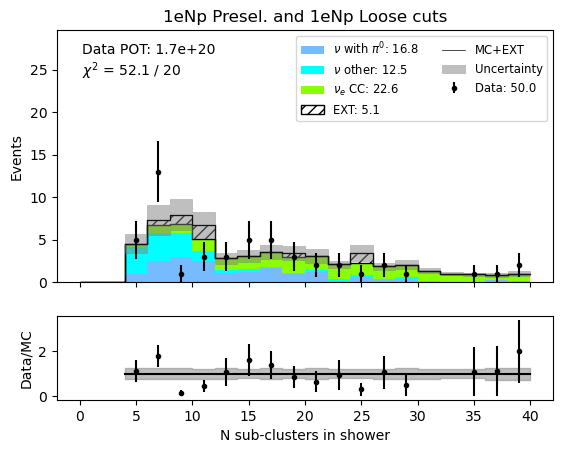

('CosmicIPAll3D', 20, (0, 200), 'CosmicIPAll3D [cm]')


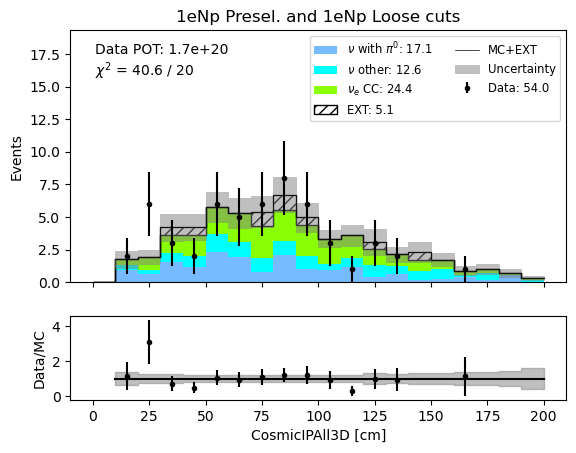

('shr_tkfit_dedx_max', 20, (0, 10), 'shr tkfit dE/dx (max, 0-4 cm) [MeV/cm]')


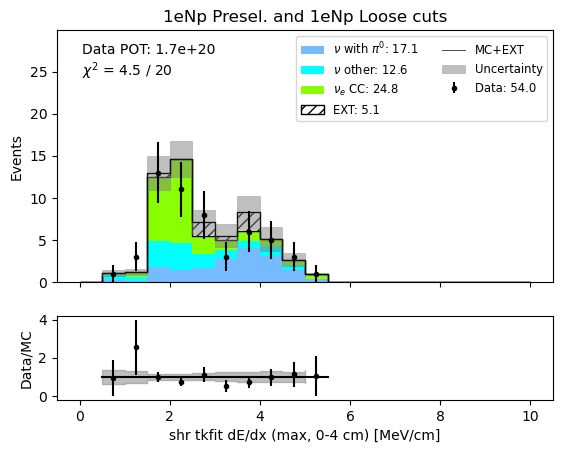

('tksh_angle', 20, (-1, 1), 'cos(trk-shr angle)')


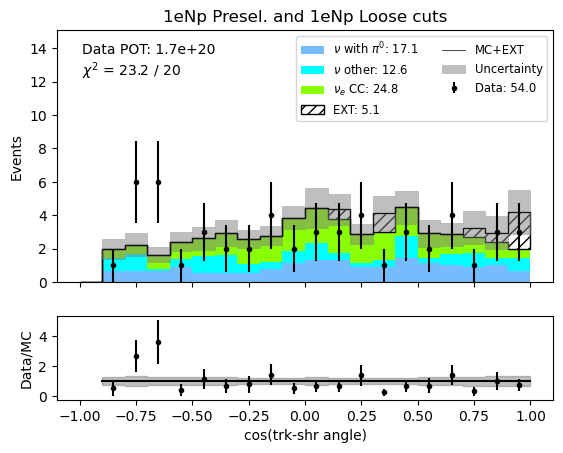

('tksh_distance', 20, (0, 40), 'trk-shr distance [cm]')


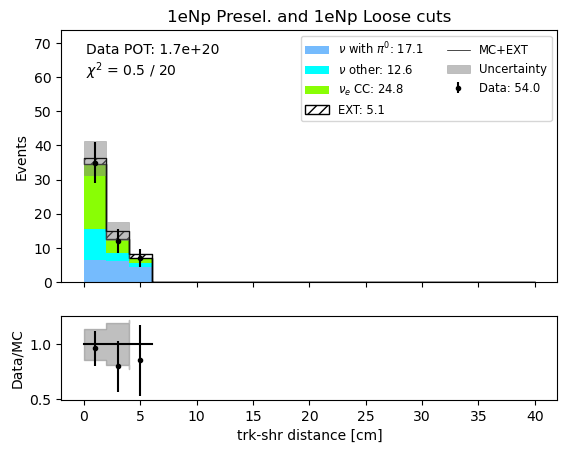

('shr_tkfit_nhits_tot', 20, (0, 20), 'shr tkfit nhits (tot, 0-4 cm) [MeV/cm]')


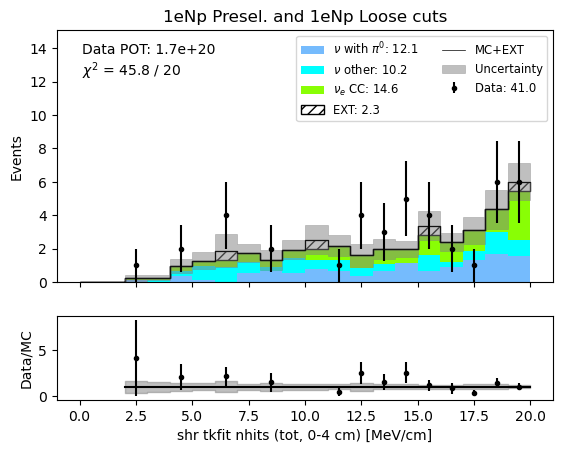

('trkpid', 21, (-1, 1), 'track LLR PID')


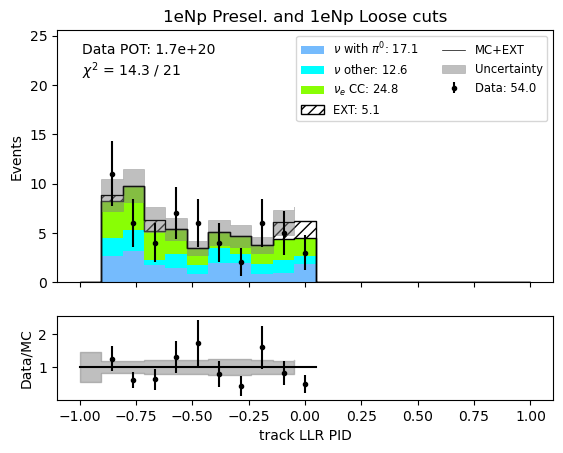

('shrmoliereavg', 20, (0, 50), 'average Moliere angle [degrees]')


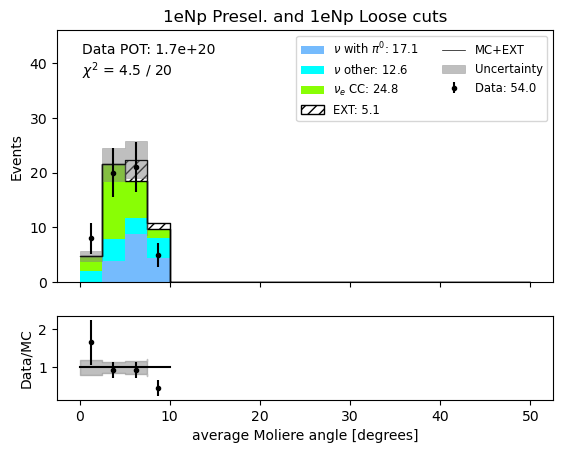

('shr_trk_len', 40, (0, 400), 'Shower track fit length [cm]')


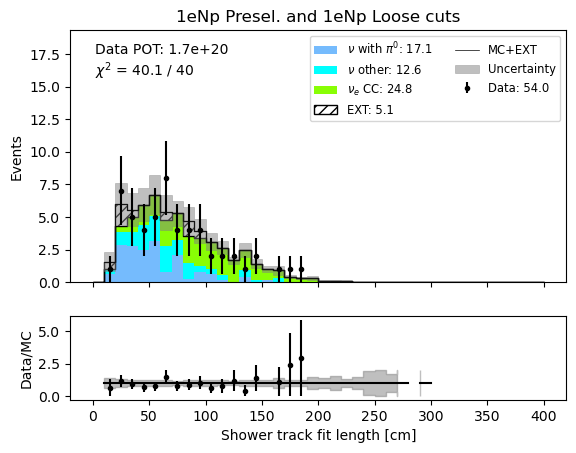

('nonpi0_score', 10, (0, 1.0), 'BDT non-$\\pi^0$ score', 'log', True)


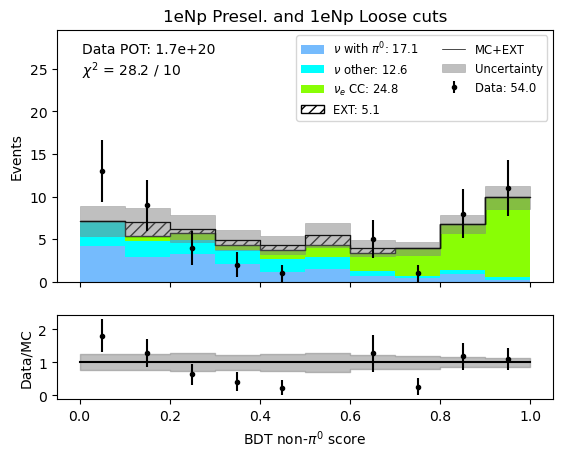

('pi0_score', 10, (0, 1.0), 'BDT $\\pi^0$ score', 'log', True)


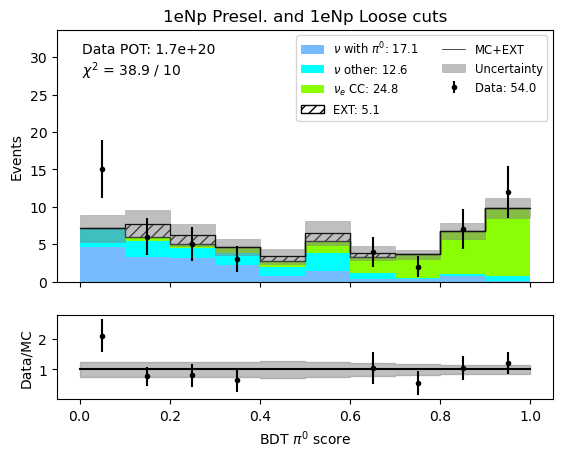

('bkg_score', 10, (0, 1.0), '1e0p BDT score', 'log', True)


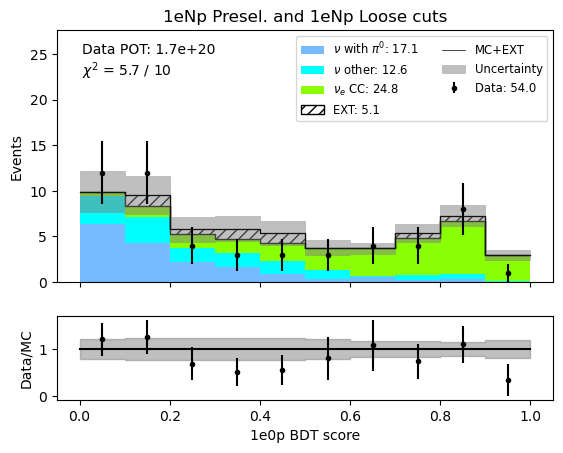

In [7]:
import matplotlib.pyplot as plt
from microfit import variable_definitions as vdef
from microfit import selections

selection = "NPL"
preselection = "NP"

for binning_def in vdef.loosesel_variables_1eNp:
    # some binning definitions have more than 4 elements,
    # we ignore the last ones for now
    binning = hist.Binning.from_config(*binning_def[:4])
    print(binning_def)
    signal_generator = hist.RunHistGenerator(
        rundata,
        binning,
        data_pot=data_pot,
        selection=selection,
        preselection=preselection,
        sideband_generator=None,
        uncertainty_defaults=None,
    )
    plotter = rp.RunHistPlotter(signal_generator)
    axes = plotter.plot(
        category_column="paper_category",
        include_multisim_errors=True,
        add_ext_error_floor=False,
        show_data_mc_ratio=True,
        show_chi_square=True,
    )
    plt.show()

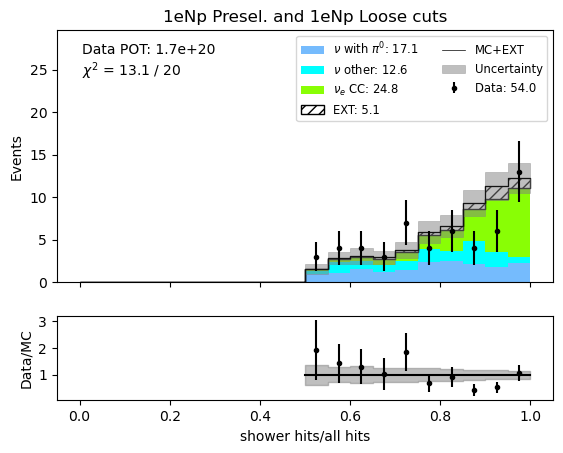

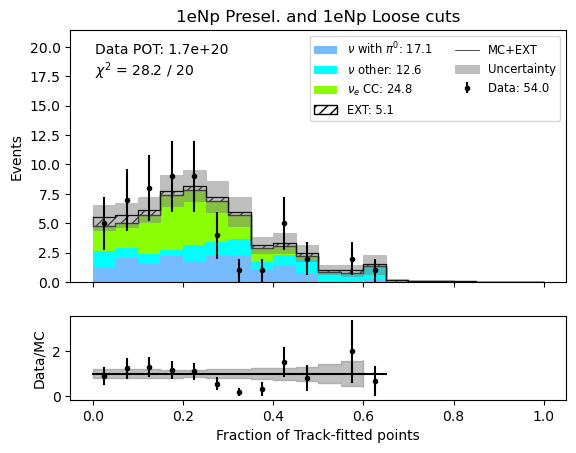

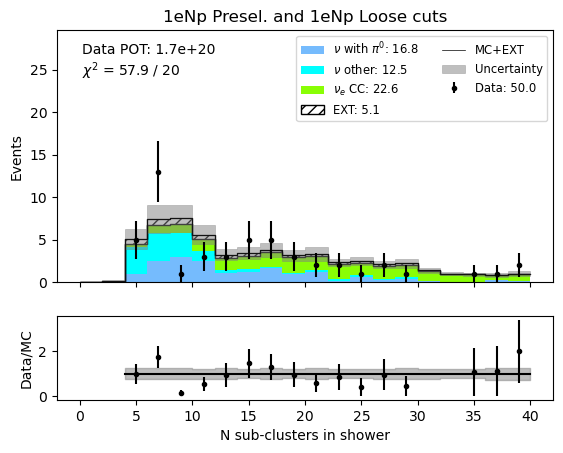

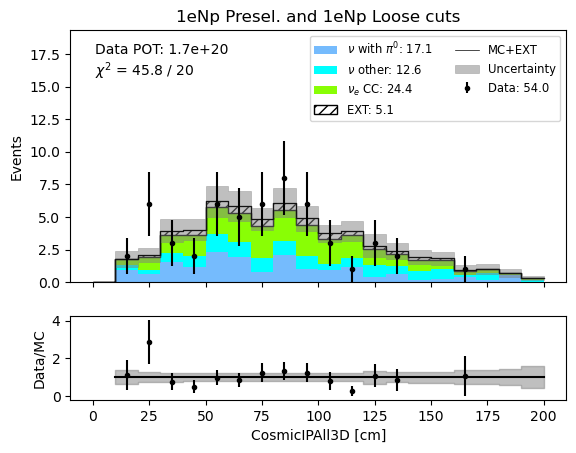

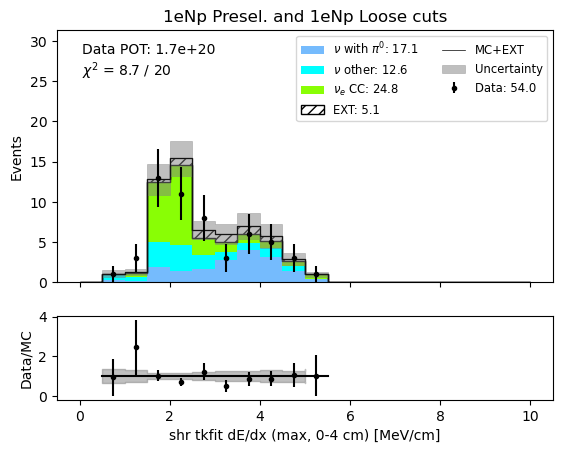

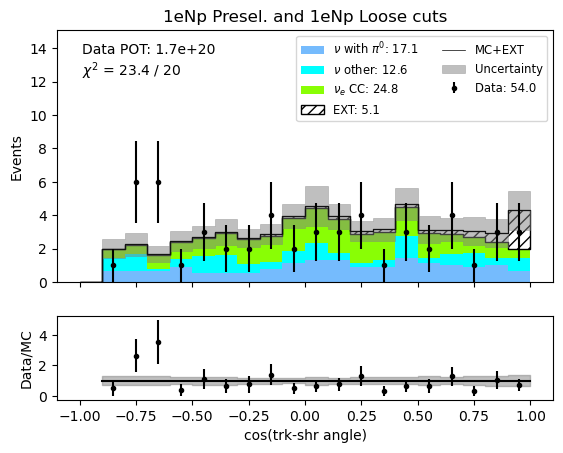

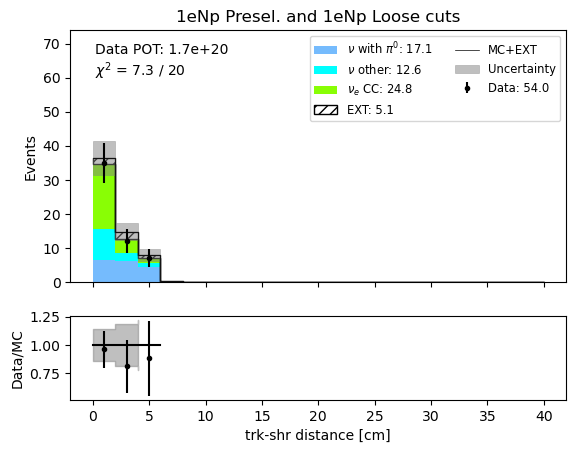

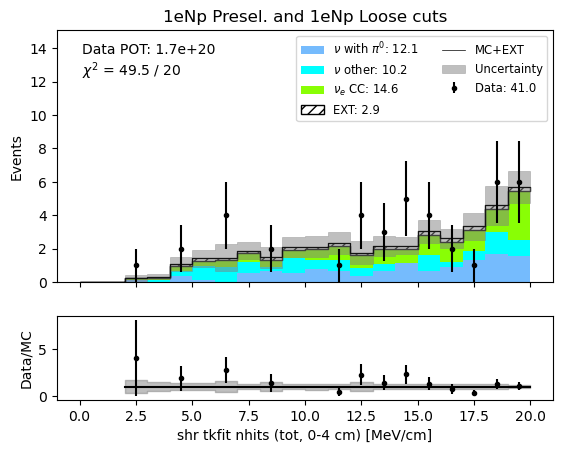

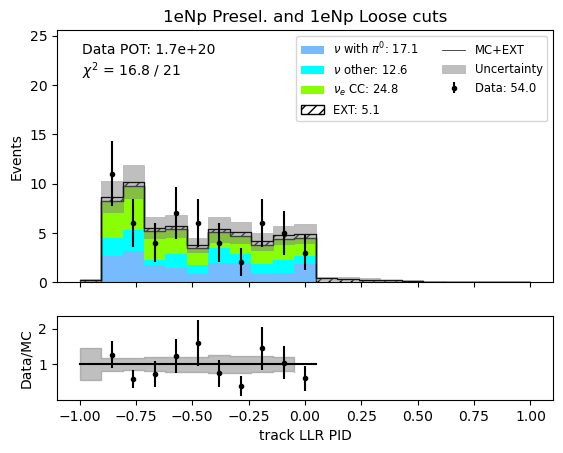

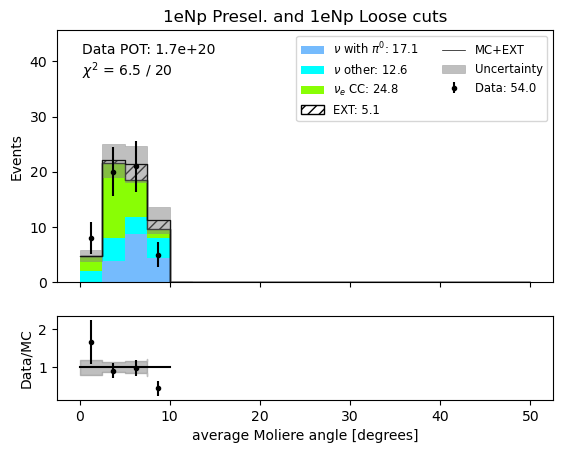

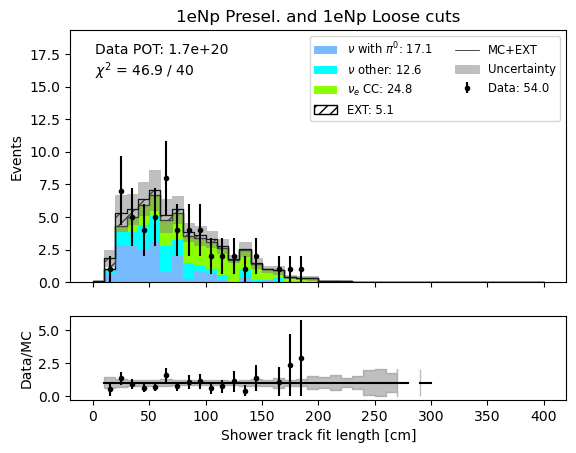

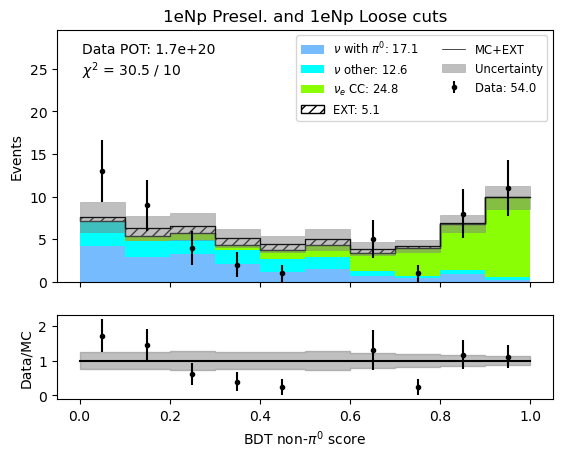

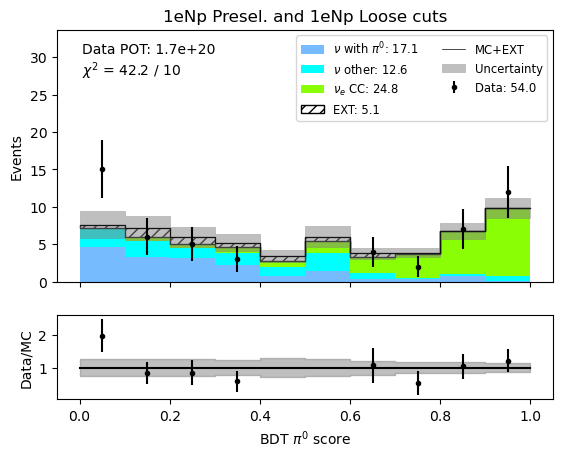

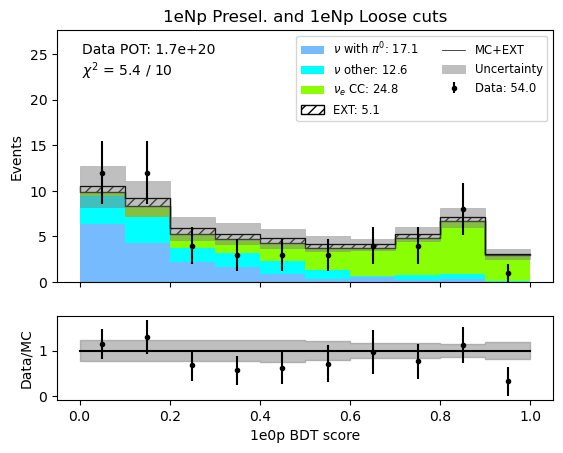

In [8]:
import matplotlib.pyplot as plt
from microfit import variable_definitions as vdef
from microfit import selections

selection = "NPL"
preselection = "NP"

for binning_def in vdef.loosesel_variables_1eNp:
    # some binning definitions have more than 4 elements,
    # we ignore the last ones for now
    binning = hist.Binning.from_config(*binning_def[:4])
    signal_generator = hist.RunHistGenerator(
        rundata,
        binning,
        data_pot=data_pot,
        selection=selection,
        preselection=preselection,
        sideband_generator=None,
        uncertainty_defaults=None,
    )
    plotter = rp.RunHistPlotter(signal_generator)
    axes = plotter.plot(
        category_column="paper_category",
        include_multisim_errors=True,
        add_ext_error_floor=False,
        smooth_ext_histogram=True,
        show_data_mc_ratio=True,
        show_chi_square=True,
    )
    plt.show()